# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [59]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
import matplotlib.pyplot as plt
# plt.style.use(['dark_background'])
# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [60]:
# Display a description of the dataset
display(data.head())
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [61]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1, 2, 3]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,6353,8808,7684,2405,3516,7844
2,13265,1196,4221,6404,507,1788


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


In [154]:
mean = data.describe().loc['mean']
samples.append(mean)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057.000000,9810.000000,9568.000000,1762.000000,3293.000000,1776.000000
1,6353.000000,8808.000000,7684.000000,2405.000000,3516.000000,7844.000000
2,13265.000000,1196.000000,4221.000000,6404.000000,507.000000,1788.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Answer:**<br>
The first sample of 1st index : Cafe because of milk, detergents_paper, and grocery all of which of are larger than the averages. <br>
The establishments of 2nd index: Restrant because of delicatessen and detergents_paper both of which are more than the averages. <br>
The establishments of 3rd index: markets because it treats the most Fresh over the mean and least detergents_paper over the mean. So I think the sampe 3 is the place where it treats fresh food and its workers cook less. <br>

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [63]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
y = data['Delicatessen']
new_data = data.drop('Delicatessen', axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=.25, random_state=1101)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn import tree
regressor = tree.DecisionTreeRegressor(random_state=1101).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test) # r2_score
print("r2 score of dt is {:.3f}".format(score))

r2 score of dt is 0.128


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**<br>
* Which feature did you attempt to predict? <br>
'Delicatessen'
* What was the reported prediction score? <br>
r2_score = 0.128
* Is this feature necessary for identifying customers' spending habits?<br>
My answer is no. In this case, we tried to predict delicatessen from other features. From the r2 score, however, it can be said that delicatessen is difficult to be predicted from others. So, delicatessen is not appropriate to differentiate customers' spending habits. On top of that, more strictly speaking, this couldn't mean that this feature is not necessary for identifying customes' spending habits. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


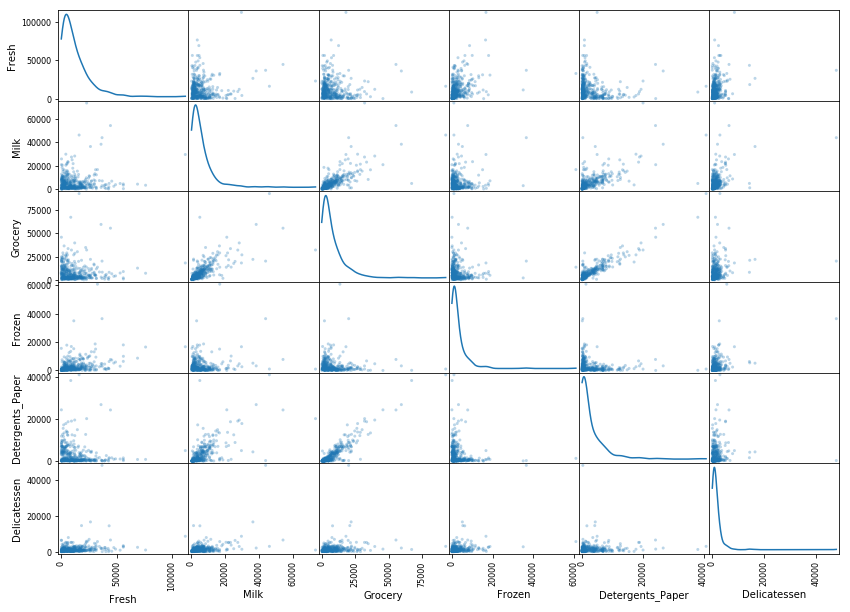

In [64]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

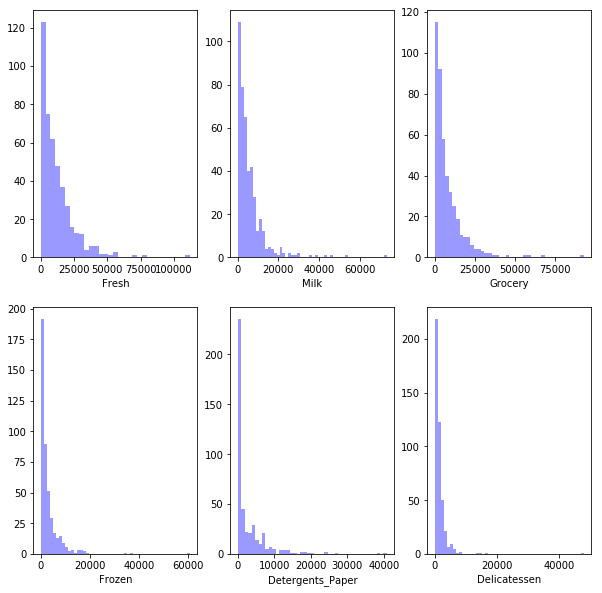

In [65]:
# distribution
import seaborn as sns
f, axes = plt.subplots(2, 3, figsize=(10, 10))
sns.distplot(data['Fresh'], kde=False, color="b", ax=axes[0, 0])
sns.distplot(data['Milk'], kde=False, color="b", ax=axes[0, 1])
sns.distplot(data['Grocery'], kde=False, color="b", ax=axes[0, 2])
sns.distplot(data['Frozen'], kde=False, color="b", ax=axes[1, 0])
sns.distplot(data['Detergents_Paper'], kde=False, color="b", ax=axes[1, 1])
sns.distplot(data['Delicatessen'], kde=False, color="b", ax=axes[1, 2])

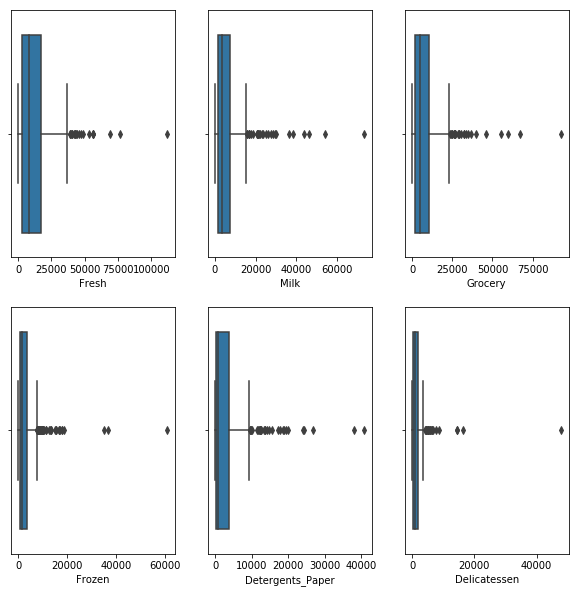

In [66]:
# outliers
f, axes = plt.subplots(2, 3, figsize=(10, 10))
sns.boxplot(data['Fresh'], ax=axes[0, 0])
sns.boxplot(data['Milk'],  ax=axes[0, 1])
sns.boxplot(data['Grocery'], ax=axes[0, 2])
sns.boxplot(data['Frozen'], ax=axes[1, 0])
sns.boxplot(data['Detergents_Paper'], ax=axes[1, 1])
sns.boxplot(data['Delicatessen'],ax=axes[1, 2])

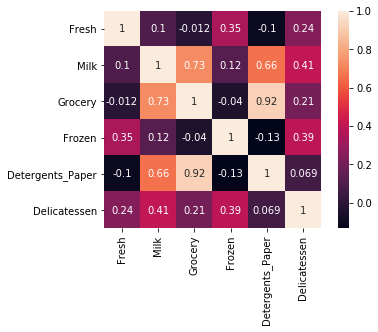

In [67]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, annot=True)
plt.figure(figsize=(10, 8))

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**<br>
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others.<br>
As for the normality, from the scatter matrix and distplot of each feature, all the feature distributions do not belong to normal distribution. On top of that, each feature includes a few outliers from each scatter matrix and boxplot. As for the large number of data points near 0, the scatterplot and pairplot show the top of kde around 0. This means that each feature has a large amount of data around 0. Although we focused on just one feature, it is ture. However, the scattermatrix also shows that most of customer has at least one feature which is not 0.  <br>
* Are there any pairs of features which exhibit some degree of correlation? <br>
From correlation heatmap, I can confirm three pairs whose correlations are larger than 0.6. 
They are the following three pairs.<br>
Milk and Grocery <br>
Milk and Detergents_paper<br>
Grocery and Detergents_paper<br>
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? <br>
This confirm my idea about the relevance of the feature, Delicatessen, because the correlation between Delicatessen and the others is pretty low from the heatmap. <br>
* How is the data for those features distributed?<br>
Milk, Grocery, and Detergetns_paper. The scattermatrix shows that oen feature increases as one another increases because of a positive correlation between those features. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


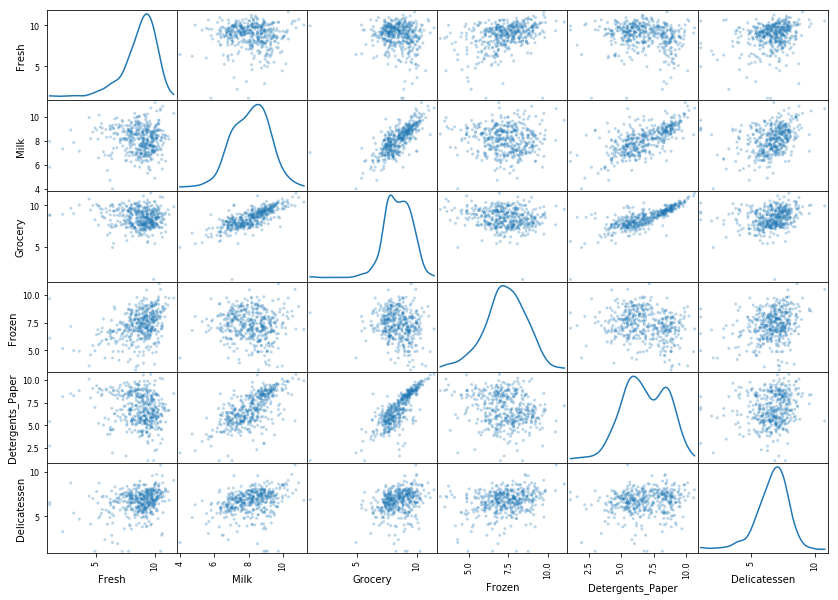

In [68]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [69]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
2,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

#### bit invert: ~x -> -(x+1)

In [70]:
log_data.shape

(440, 6)

In [142]:
# For each feature find the data points with extreme high or low values
outliers_candidate = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q1, Q3 = np.percentile(log_data[feature], [25, 75])
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers_candidate.append(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** <br>
* Are there any data points considered outliers for more than one feature based on the definition above? <br>
Based on the definition above, each feature has at least one outliers. Especially, Fresh and Delicatessen has more outliers than the other features. 
* Should these data points be removed from the dataset? <br>
Given dataset is 440 records, which is not be large. So I don't think that removing all of the outlier candidates is good approach. Conidering the data size and model performance, though, some of these data points should be removed in this case. 
* If any data points were added to the `outliers` list to be removed, explain why.<br>
I added 5 data points to 'outliers' list. All of them are appears in outlier candidate table of more than one feature. This is because I'd like to save amount of the dataset and simultaneously remove bad influence from these outliers when I apply k-means algorithm to this dataset. When k-means calcurate the centroids of clusters, outliers bring bad influence on the calculration. In the end, the centroids tend to be in the wrong position and it interrupt appropriate clustering. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

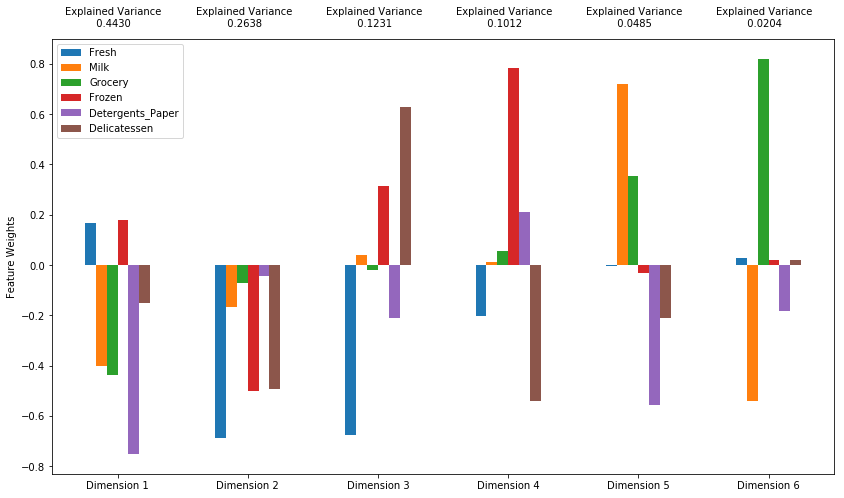

In [105]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

High correlation in Milk and Grocery and Detergents_paper.

Text(0,0.5,'PCs')

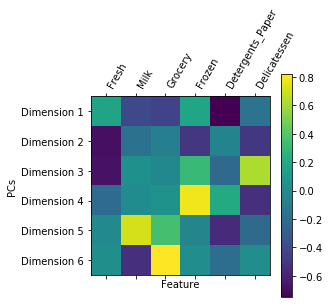

In [107]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1, 2, 3, 4, 5], ["Dimension 1", "Dimension 2", "Dimension 3", "Dimension 4", "Dimension 5", "Dimension 6"])
plt.colorbar()
plt.xticks(range(len(log_samples.columns)), 
          log_samples.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("PCs")

In [139]:
pca.components_

array([[ 0.16746374, -0.40143866, -0.43811142,  0.17820975, -0.75142613,
        -0.14987105],
       [-0.68593522, -0.16722783, -0.07072902, -0.50054207, -0.04244398,
        -0.49414702],
       [-0.67738927,  0.04020501, -0.01953317,  0.31504299, -0.21170161,
         0.62855082],
       [-0.204293  ,  0.01281068,  0.05567564,  0.78544905,  0.20961368,
        -0.54233972],
       [-0.00261356,  0.71923846,  0.3553861 , -0.0330861 , -0.55815441,
        -0.20918629],
       [ 0.02915623, -0.54018269,  0.82053348,  0.02054106, -0.18238824,
         0.01974794]])

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [75]:
# 1st qustion
print("1st answer is {:.3f} ".format(pca.explained_variance_ratio_[0:2].sum()))
print("2nd answer is {:.3f}".format(pca.explained_variance_ratio_[0:4].sum()))

1st answer is 0.707 
2nd answer is 0.931


(1, 6)

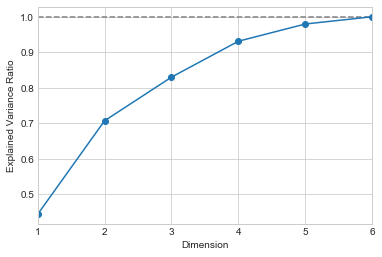

In [138]:
# 3rd question
x = np.arange(1,7)
y = np.cumsum(pca.explained_variance_ratio_)
sns.set_style("whitegrid")
plt.plot(x, y, marker="o")
plt.xlabel("Dimension")
plt.ylabel("Explained Variance Ratio")
plt.hlines(1, min(x), max(x), linestyles="dashed", colors="gray")
plt.xlim(min(x), max(x))

**Answer:**<br>
* How much variance in the data is explained* **in total** *by the first and second principal component? <br>
0.707
* How much variance in the data is explained by the first four principal components? <br>
0.931
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.<br><br>
**Dimension 1:** Cumulative variance explained is 0.443. In terms of positive variance explained, there are no weighted features. On the other hand, in terms of negative variance expained, three features of Milk, Grocery, and Detergent_Papers are weighted. This is consistent with the high correlation between those three features. Also, this dimension means that whether or not a customer tend to buy those three items at the same time can identify all the customer. So, this dimension implies how much a customer spend to cook by themselves. <br><br>
**Dimension 2:** Cumulative variance explained is 0.707. In terms of positive variance explained, no features are weighted. On the other hand, in terms of negative value, three features of Fresh, Frozen, and Delicattessen are weighted. This means that whether or not a customer tend to buy those three items simultaneously can differentiate all the customer. Specifically, it means how much a customer spend to provide foods, which include both read-made and hand-made. <br><br>
**Dimension 3:** Cumulative variance explained is 0.830. In terms of positive variance explained, two features of Delicatessen and Frozen are large whereas Fresh is large in terms of negative variance. Considering the difference between positve and negative, this means that a customer who often simultaneously purchase Delicatessen and Frozen rarely buy Fresh and vice versa. In my view, this dimension implies how well they prefer ready-made foods. <br><br>
**Dimension 4:** Cumulative variance explained is 0.931. In terms of positive variance explained, the feature of Frozen is large. In terms of negative value explained, the feature of Delicatessen is large. This dimension shows that how often a customer purchase Frozen and how rarely a customer buy Delicatessen can differentiate the customers. For instance, some customers who often purchase Frozen rarely buy Delicatessens, and vice versa. <br><br>
**Dimension 5:** Cumulative variance explained is 0.980. In terms of positive variance explained, two features of Milk and Grocery are large whereas Detergent_Paper and Delicatessen are relatively large. <br><br>
**Dimension 6:** Cumulative variance explained is 1.00. In negative of positive variance explained, Grocery is large whereas Milk is relatively large in terms of negative value.<br>

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [143]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7887,-0.8123,0.2315,-0.0036,0.1194,-0.2106
1,-1.8834,-1.5991,1.3204,-0.5432,-0.3934,-0.3117
2,1.1553,-1.4052,0.5422,0.4127,-0.6865,0.6409


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [144]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [145]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7887,-0.8123
1,-1.8834,-1.5991
2,1.1553,-1.4052


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

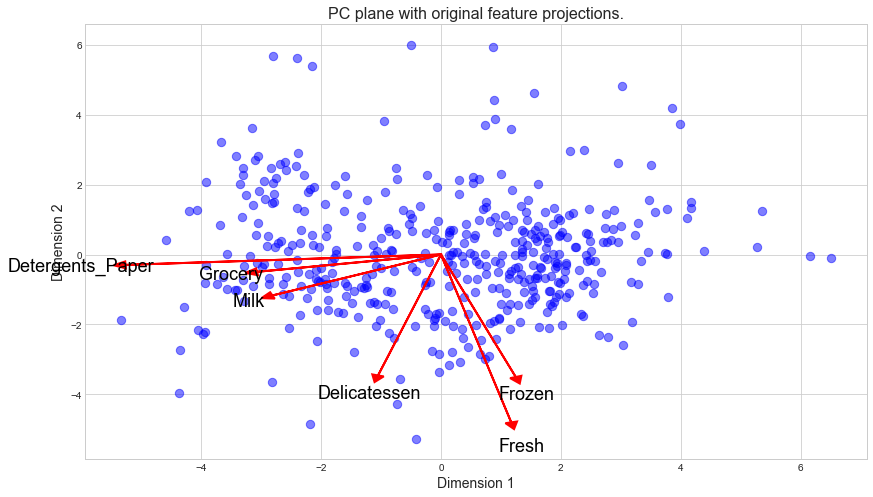

In [146]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?
- Detergent_Paper is strongly correlated with the 1st component whereas Fresh with 2nd component.<br>
- Yes. The graph obtained from the section implementing PCA with 6 components shows their large feature weights. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? <br>
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? <br>
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?<br>
** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**<br>
* What are the advantages to using a K-Means clustering algorithm? <br>
Easy to implement, and Computationaly fast.
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? <br>
Soft Clustering and more flexible cluster shape by choosing covariance type. <br> 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?<br>
GMM. There are three reasons why I chose GMM. <br>
1st, the data size is around 440. So, k-means advantage of efficient computational ability is not dominant in this case.<br>
2nd, k-means assumes that the data distribution belongs to spherical. It is difficult to confirm that the data distributes spherically from the biplot. <br>
3rd, GMM is soft clustering. From the biplot, it is not obvious which cluster each data point belongs to. This means that soft clustering method in which each data point can belong to more than one cluster is appropriate for this dataset. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [147]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for c in range(2, 10):
    clusterer = GaussianMixture(n_components=c, covariance_type='full', init_params='kmeans', random_state=1101)

    # TODO: Predict the cluster for each data point
    preds = clusterer.fit_predict(reduced_data) # returns each data points label
    prob = clusterer.predict_proba

    # TODO: Find the cluster centers
    preds_ser = pd.Series(preds, name='Cluster')
    preds_df = pd.concat([reduced_data, preds_ser], axis=1)
    centers = list(preds_df.groupby('Cluster').mean())

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("Silhouette score with {} components of GMM is {:.3f}".format(c, score))

Silhouette score with 2 components of GMM is 0.423
Silhouette score with 3 components of GMM is 0.406
Silhouette score with 4 components of GMM is 0.360
Silhouette score with 5 components of GMM is 0.312
Silhouette score with 6 components of GMM is 0.337
Silhouette score with 7 components of GMM is 0.347
Silhouette score with 8 components of GMM is 0.276
Silhouette score with 9 components of GMM is 0.253


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**<br>
* Report the silhouette score for several cluster numbers you tried. <br>
Silhouette score with 2 components of GMM is 0.423<br>
Silhouette score with 3 components of GMM is 0.406<br>
Silhouette score with 4 components of GMM is 0.360<br>
Silhouette score with 5 components of GMM is 0.312<br>
Silhouette score with 6 components of GMM is 0.337<br>
Silhouette score with 7 components of GMM is 0.347<br>
Silhouette score with 8 components of GMM is 0.276<br>
Silhouette score with 9 components of GMM is 0.253<br><br>

* Of these, which number of clusters has the best silhouette score?<br>
The best silhouette score is 0.423 with 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [148]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import scipy.stats

c=2
clusterer = GaussianMixture(n_components=c, covariance_type='full', init_params='kmeans', random_state=1101)

# TODO: Predict the cluster for each data point
preds = clusterer.fit_predict(reduced_data) # returns each data points label
prob = clusterer.predict_proba(reduced_data)

# TODO: Find the cluster centers
preds_ser = pd.Series(preds, name='Cluster')
preds_df = pd.concat([reduced_data, preds_ser], axis=1)
centers = np.array(preds_df.groupby('Cluster').mean())

## another solution: 
# centers = np.empty(shape=(clusterer.n_components, reduced_data.shape[1]))
# for i in range(clusterer.n_components):
#     density = scipy.stats.multivariate_normal(cov=clusterer.covariances_[i], mean=clusterer.means_[i]).logpdf(reduced_data)
#     centers[i, :] = reduced_data.iloc[np.argmax(density),]

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("Silhouette score with {} components of GMM is {:.3f}".format(c, score))

Silhouette score with 2 components of GMM is 0.423


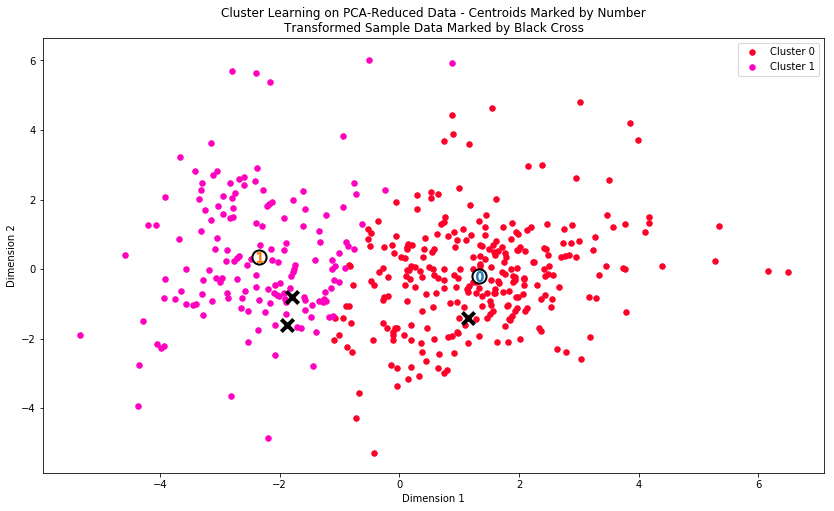

In [97]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [151]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
mean = data.describe().loc['mean']
display(true_centers.append(mean))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9119.000000,2055.000000,2679.000000,2112.000000,334.000000,727.000000
Segment 1,3444.000000,8221.000000,12895.000000,845.000000,5156.000000,973.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**<br>
Segment 0 represents a kind of market which mainly provides ingredients and needs less detergents_paper than the average. <br>
Segmetn 1 represents a sort of cafe which mainly provides larger amount of ready-made dish, milk, detergents_paper than the averagesbecause it has large values in the Grocery and Detergents_Paper. Especially, the large values of grocery and detergents_paper implies that the establishment treats foods and needs to clean frequently.  That's why I chose a restrant.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [152]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [153]:
display(samples)
display(true_centers)
print("Sample point 0 predicted to be in Cluster 1\nSample point 1 predicted to be in Cluster 1\nSample point 2 predicted to be in Cluster 0")

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,6353,8808,7684,2405,3516,7844
2,13265,1196,4221,6404,507,1788


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9119.0,2055.0,2679.0,2112.0,334.0,727.0
Segment 1,3444.0,8221.0,12895.0,845.0,5156.0,973.0


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**<br>
* For each sample point, which customer segment from* **Question 8** *best represents it? <br>
For sample point 0 and 1, customer segment 1 represents it whereas the customer segment 0 represents well for sample poit 2. <br>
* Are the predictions for each sample point consistent with this?*<br>
Yes. As I answered in the question 1, each smaple point consistent with this. I did predicted sample 0 and 1 as a kind of establishment which mainly provides dish whereas sample 3 as a establishment which mainly provides ingredients. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**<br>
I'll never know if I don't try it. However, the assumption that the change affects all customers differently depending on the customer cluster we've already obtained. In order to validate this hypothesis, it is better to split all the customers into 4 groups and conduct A/B tests with those 4 groups. More specifically, now we've gotten the 2 customer segments based on the previous unsupervised learning. Furthermore, the each customer segment is split into 2 groups. Those 2 groups are composed of one whose delivery service is changed from 5 days a week to 3 days week and the other whose delivery servise is not changed. By doing so, we'll obtain the different 4 groups, 2 by 2. Finally, after A/B testing with those groups, we'll define which segment we should bring a change in the delivery service to. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**<br>
As the target variable is the "Cluster", a supervised learner will be trained and try to predict cluster from the two columns of the reduced_data. <br>
After that, the trained model can predict which segment the each new customer belongs to based on the provided estimates for anticipated annual spending of each product category. Needless to say, to do so, given new customer data needs to be converted into the same format as the reduced_data by applying pca technique.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

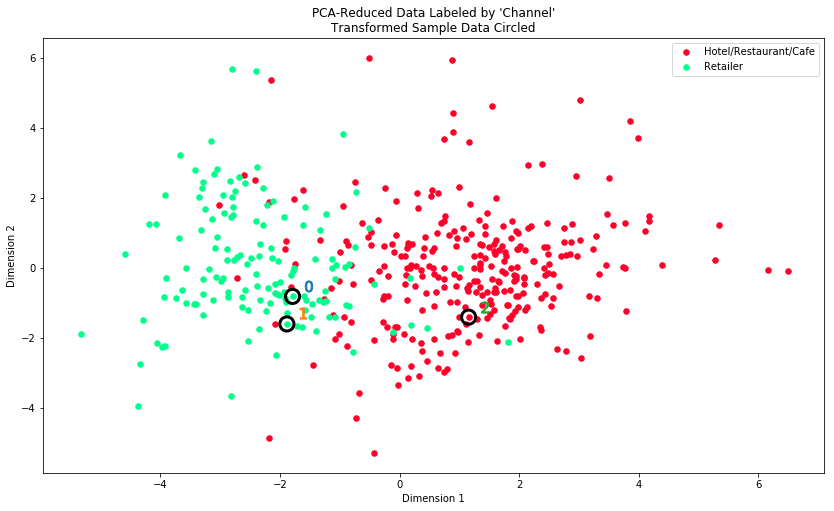

In [101]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

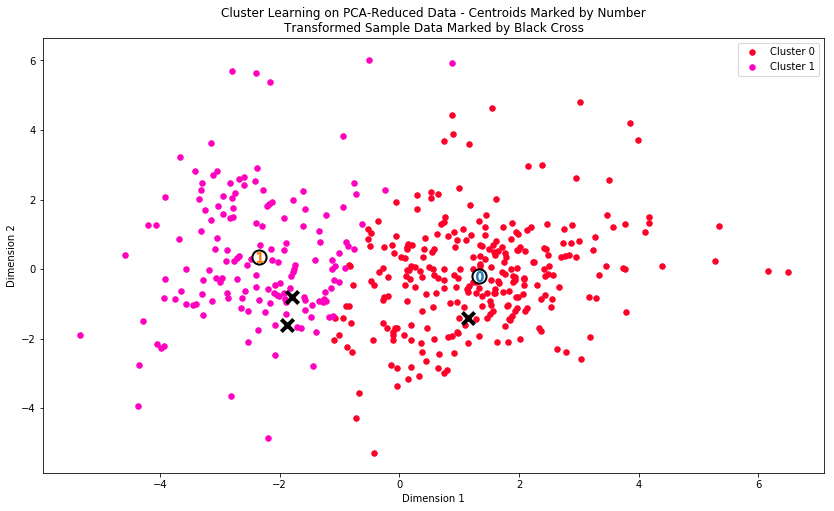

In [102]:
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

In [103]:
print(np.sum(clusterer.predict_proba(reduced_data)==1.0))
print(np.max(clusterer.predict_proba(reduced_data)))

0
0.999999999571795


**Answer:**<br>
* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? <br>
Larger distance between the clusters and less outliers. From the graph displaying the clustering results based on 'Channel' data, the distance between 0 and 1 is too short. This means that the clustering is not appropriate. Furthermore, in the underlying distribution of HoReCa customers to Retailer customers, there are some outliers from HoReCa cluster in a Retailers cluster. On the other hand, the graph created by the clustering algorithm and number of clusters I've chosen shows less outlies, 5 data points, and assign all data points to cluster0 or cluster1 based on the model. Now, we can confirm less outliers in the later graph. <br><br>
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? <br>
There are no data points with 100% probability of belonging to a cluster. There is, however, a data point with the probability of 0.999999999571795. <br><br>

* Would you consider these classifications as consistent with your previous definition of the customer segments?<br>
Yes, I would. Our model of GMM shows the highest silhouette score with 2 components. And it consistents with the 2 clusters of HoReCa and Retailer. That's why I'd consider so.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.